# Support Vector Machines

In this section of the assignment, you will get to implement Support Vector Machines which are among the best (and many believe are indeed the best)“off-the-shelf” supervised learning algorithm.

This section is further divided into 3 subsections.


*   In the first subsection, you will work on a synthetic dataset and visualize the boundary predicted by SVM. You will also vary the value of C-parameter and see how the decision boundary changes. **Please note that you cannot use inbuilt sklearn function for SVM in this sub-section**. You can only use a QCQP (Quadratically Constrained Quadratic Program) solver like CVXPY. 

  References which you may find helpful for this subsection: 
  
  1.   https://www.cvxpy.org/
  2.   https://www.cvxpy.org/examples/basic/quadratic_program.html

  Note that in this section you are expected to show how you derived the Quadratically Constrained form(which can be passed into the solver) from the basic principles of SVM algorithm
*  In the next subsection you will use be using the famous MNIST dataset to explore various kernels and report the results. **Please note you may use inbuilt sklearn SVM functions in this subsection**


In [1]:
import numpy as np
import cvxpy as cp
import pylab as pl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore',category=UserWarning)

### Subsection 1

In [2]:
# Feel free to use this helper function to visualize 2D points X with labels +1 or -1
def plot_points(X, Y):
    reds = []
    blues = []
    for i in range(Y.shape[0]):
        if Y[i] == 1:
            reds.append(X[i])
        else:
            blues.append(X[i])
    reds = np.array(reds)
    blues = np.array(blues)
    plt.scatter(reds[:, 0], reds[:, 1], c = 'r')
    plt.scatter(blues[:, 0], blues[:, 1], c = 'b')

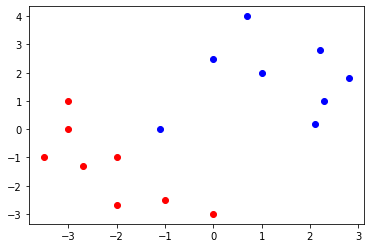

In [3]:
# Create Synthetic Data and visualize the points
X = np.array([[-3.5, -1], [-3, 0], [-3, 1], [-2.7, -1.3], [-2, -1], [-2, -2.7], 
              [-1, -2.5], [0, -3], [-1.1, 0], [0, 2.5], [1, 2], [0.7, 4], 
              [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8]])
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1])

plot_points(X, y)
plt.show()

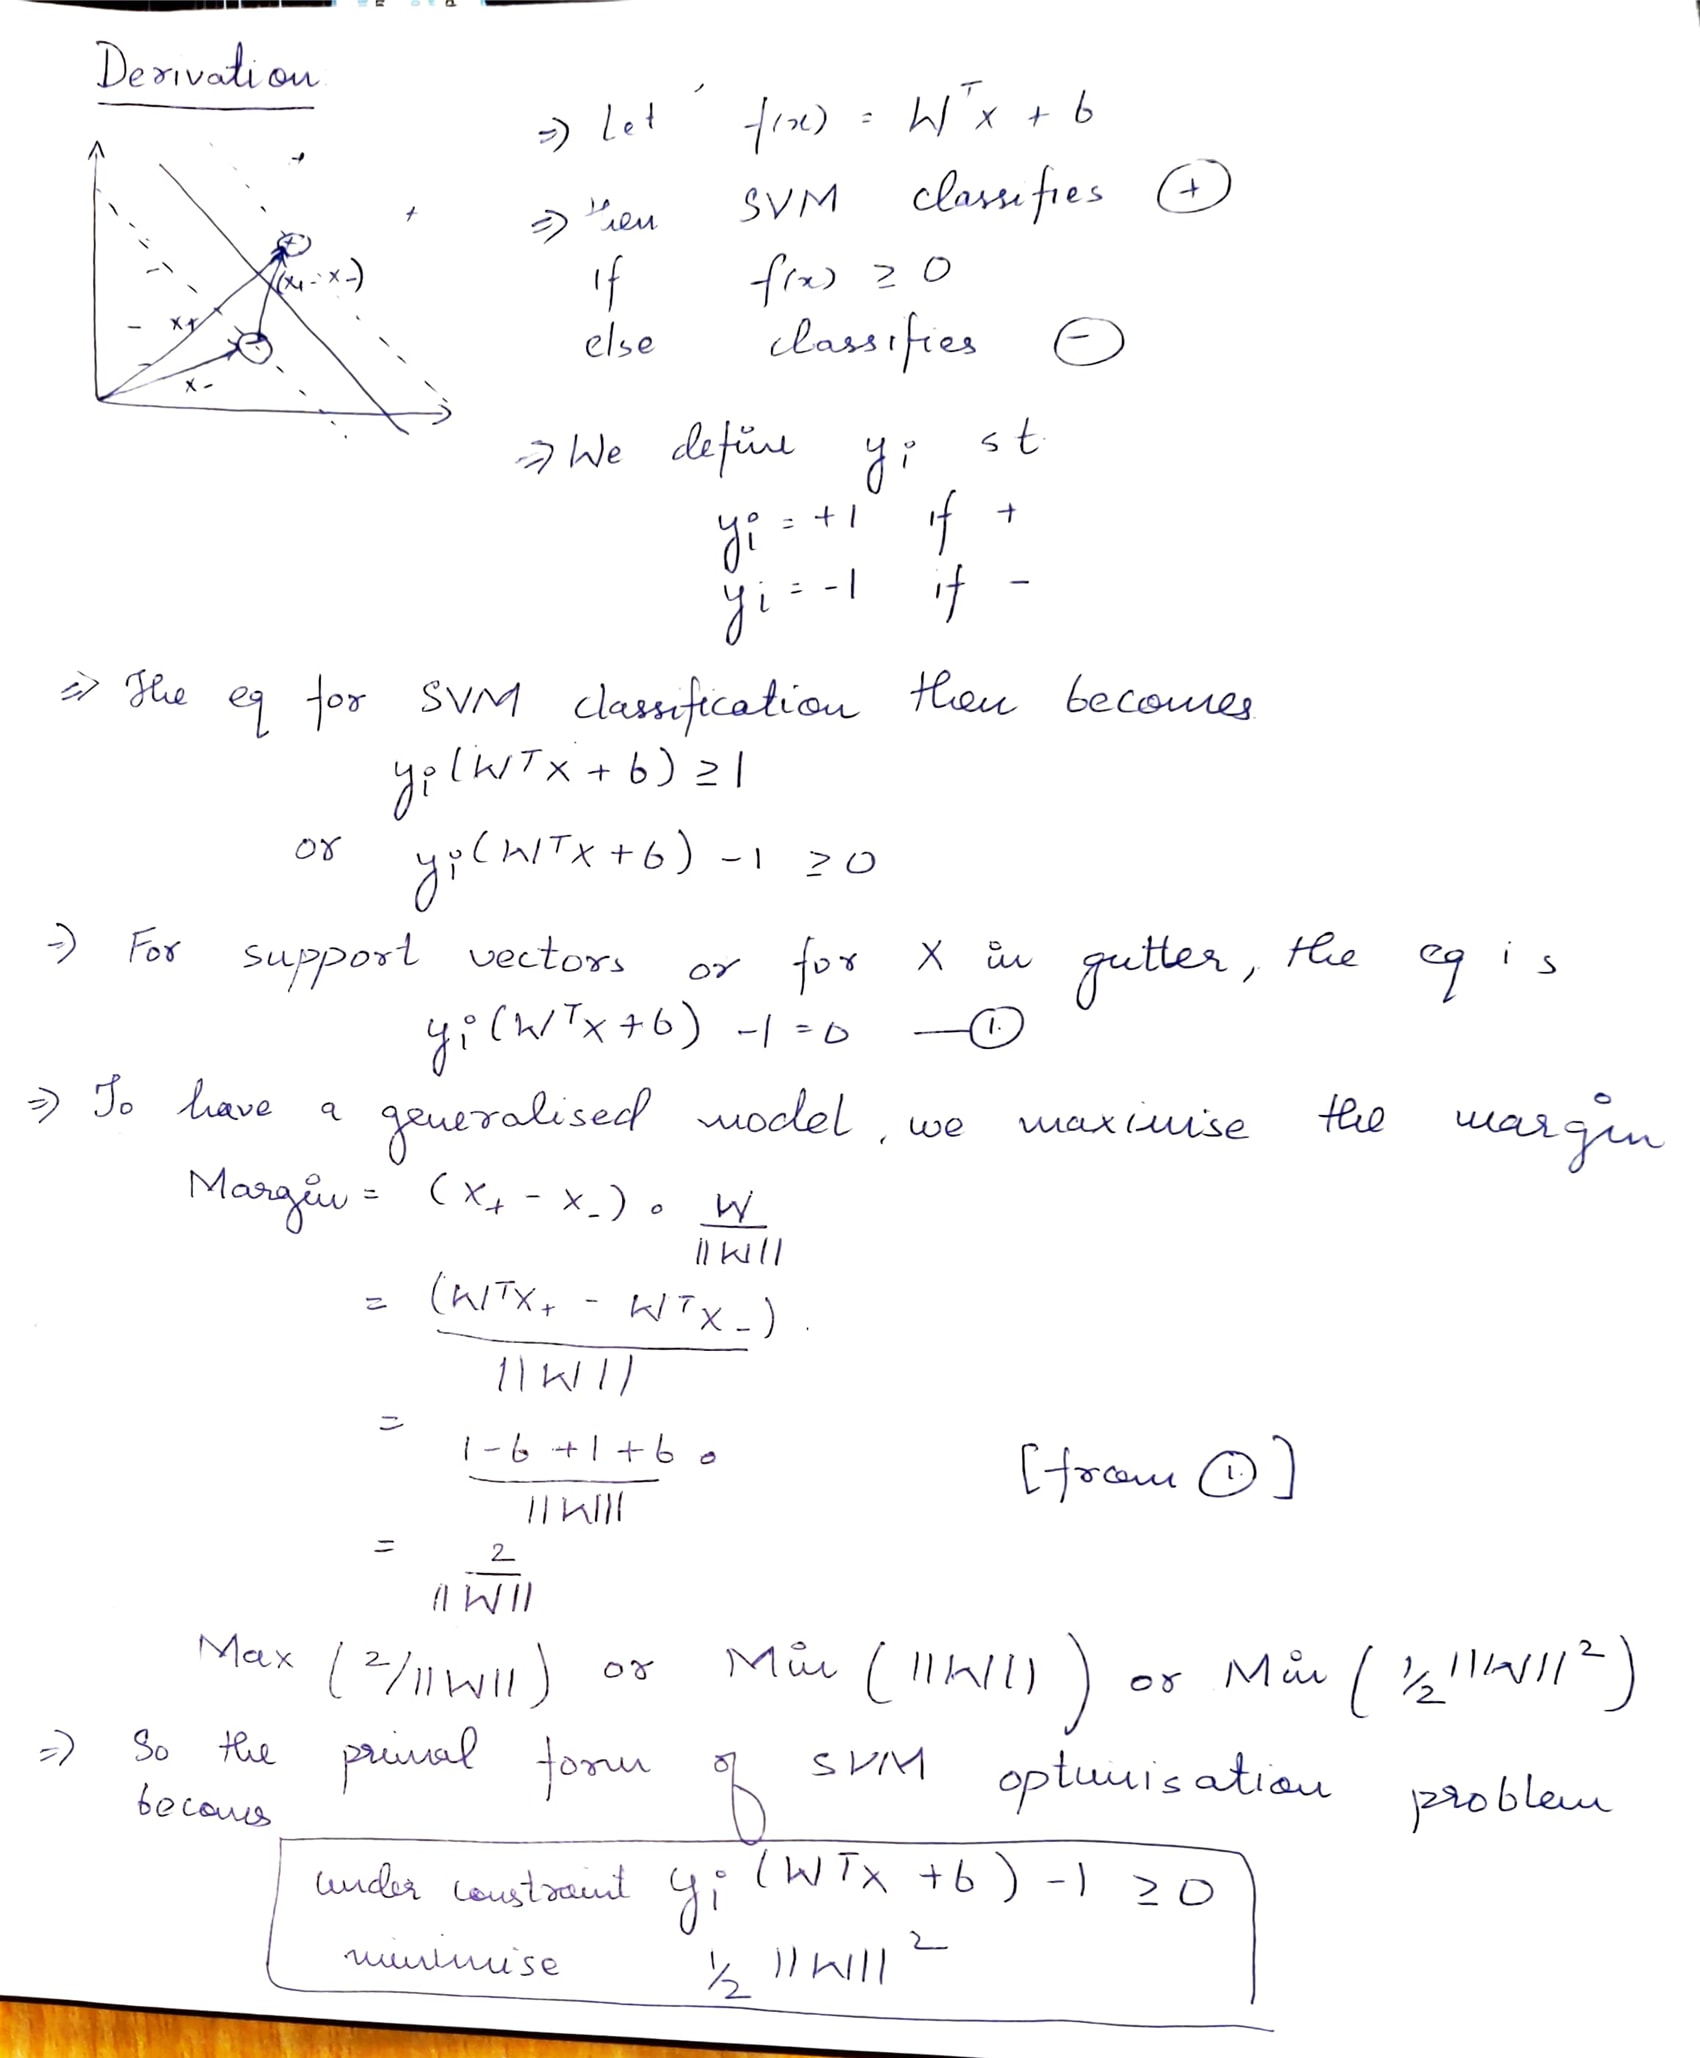

In the next cell you are required to derive the Quadratic Constrained Quadratic form of SVM **without soft constraints** from the basic principles. Start with the idea that SVM tries to maximize the margin and then derive the form which you can feed to the solver.

Please print the values of w, b. 

**Note: You are also required to upload a page of the derivation. You may also type it in markdown here**

**Note: You cannot use sklearn SVM functions here**

In [4]:
# Write your code here
class svm():

  def init(self):
    self.bias = cp.Variable()

  def train(self,x_train,y_train):
    self.weight_matrix = cp.Variable(x_train.shape[1])
    self.bias = cp.Variable()
    cond = cp.norm(self.weight_matrix)**2
    cond = 0.5*cond
    objective = cp.Minimize(cond)
    constraint = [cp.multiply(y_train,x_train@self.weight_matrix+self.bias)-1>=0]
    prob = cp.Problem(objective,constraint)
    prob.solve()
    self.weight_matrix = self.weight_matrix.value
    self.bias = self.bias.value
    return self.weight_matrix,self.bias



def caly(svmObj,val,c=0):
  num = -float(svmObj.weight_matrix[0])*val - svmObj.bias +c
  den = float(svmObj.weight_matrix[1])
  return num/den

def plotsvm(X,Y,svmObj, sv=0):
  if (sv==0):
    reds = []
    blues = []
    for i in range(Y.shape[0]):
        if Y[i] == 1:
            reds.append(X[i])
        else:
            blues.append(X[i])
    reds = np.array(reds)
    blues = np.array(blues)
    plt.scatter(reds[:, 0], reds[:, 1], c = 'r')
    plt.scatter(blues[:, 0], blues[:, 1], c = 'b')

    pl.plot([-4,4],[caly(svmObj,-4),caly(svmObj,4)],"k")
    pl.plot([-4,4],[caly(svmObj,-4,c=1),caly(svmObj,4,c=1)],"k--")
    pl.plot([-4,4],[caly(svmObj,-4,-1),caly(svmObj,4,-1)],"k--")
  
  else:
    X1 = X[np.where(X[:,1]==np.round(caly(svmObj,X[:,0],1),1))]
    a,b = X1[:,0], X1[:,1]
    pl.plot(a,b, "ro")
    X2 = X[np.where(X[:,1]==np.round(caly(svmObj,X[:,0],-1),1))]
    c,d = X2[:,0], X2[:,1]   
    pl.plot(c,d, "bo")
    
    pl.plot([-4,4],[caly(svmObj,-4),caly(svmObj,4)],"k")
    pl.plot([-4,4],[caly(svmObj,-4,c=1),caly(svmObj,4,c=1)],"k--")
    pl.plot([-4,4],[caly(svmObj,-4,-1),caly(svmObj,4,-1)],"k--")


In [5]:
# Write your code here
class svmSlack():

  def init(self):
    self.bias = cp.Variable()

  def train(self,x_train,y_train,C):
    self.weight_matrix = cp.Variable(x_train.shape[1])
    self.bias = cp.Variable()
    self.slack_variable = cp.Variable(x_train.shape[0])
    cond1 = cp.norm(self.weight_matrix)**2
    cond1 = 0.5*cond1
    cond1 = cond1 + C*cp.sum(self.slack_variable)
    cond = cond1
    objective = cp.Minimize(cond)
    # objective = cp.Minimize(0.5*cp.norm(self.weight_matrix)**2 + C*cp.sum(self.slack_variable))

    constraint = [cp.multiply(y_train,x_train@self.weight_matrix+self.bias)-1+self.slack_variable>=0 , self.slack_variable>=0]
    prob = cp.Problem(objective,constraint)
    prob.solve()
    self.weight_matrix = self.weight_matrix.value
    self.bias = self.bias.value
    return self.weight_matrix,self.bias


In [ ]:
sv = svm()
w,b = sv.train(X,y)
print("Calculated weight matrix is :",w)
print("Calculated bias is :",b)


Calculated weight matrix is : [-1.73913043 -1.30434783]
Calculated bias is : -2.9130434780347696


In the next cell you are required to visualize the boundary predicted by the solver. You may want to revise up on how to plot the a line given w, b. Please plot w vector as well as the margin lines

You may want to create a function to plot the line of separation as you would require this frequently in the subsequent parts of the assignment.

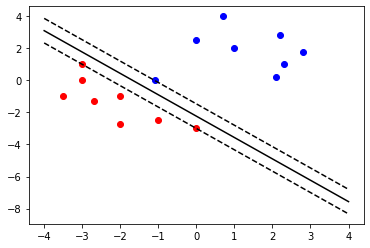

In [ ]:
plotsvm(X,y,sv,0)

In the next cell please plot only the support vectors along with the boundary, w vector, and margins. 

**Note: You are not supposed to hard-code the points here**

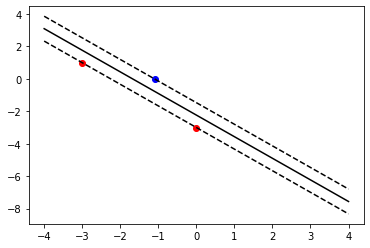

In [ ]:
plotsvm(X,y,sv,1)

In the next cell add the following points:
* (-4, -10) with label 1
* (4, 4) with label -1

Is the decision boundary changed after adding the points? Explain your observations theoretically.

The decision boundary remains the same because the newly added points are not the support vectors. The decision boundary changes only when the added points contribute to support vectors.

In [7]:
X_test = np.append(X,[[-4,-10],[4,4]],axis=0)
Y_test = np.append(y,[1,-1],axis=0)

In [ ]:
sv = svm()
w,b = sv.train(X_test,Y_test)
print("Calculated weight matrix is :",w)
print("Calculated bias is :",b)


Calculated weight matrix is : [-1.73913043 -1.30434783]
Calculated bias is : -2.913043478291523


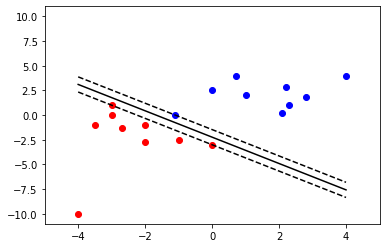

In [ ]:
plotsvm(X_test,Y_test,sv,0)
plt.ylim(-11,11)
plt.xlim(-5,5)
plt.show()

In the next cell you are required to modify your framing of optimisation problem to incorporate soft constraints also known as slack. Plot the decision boundary, w and margin lines for various values of C: $0.01$, $0.1$, $3$, $10$, $100$.

Explain your results theoretically. How does the boundary change with varying values of C? Why?

**Note: Use the modified X and y i.e after adding points in previous cell**

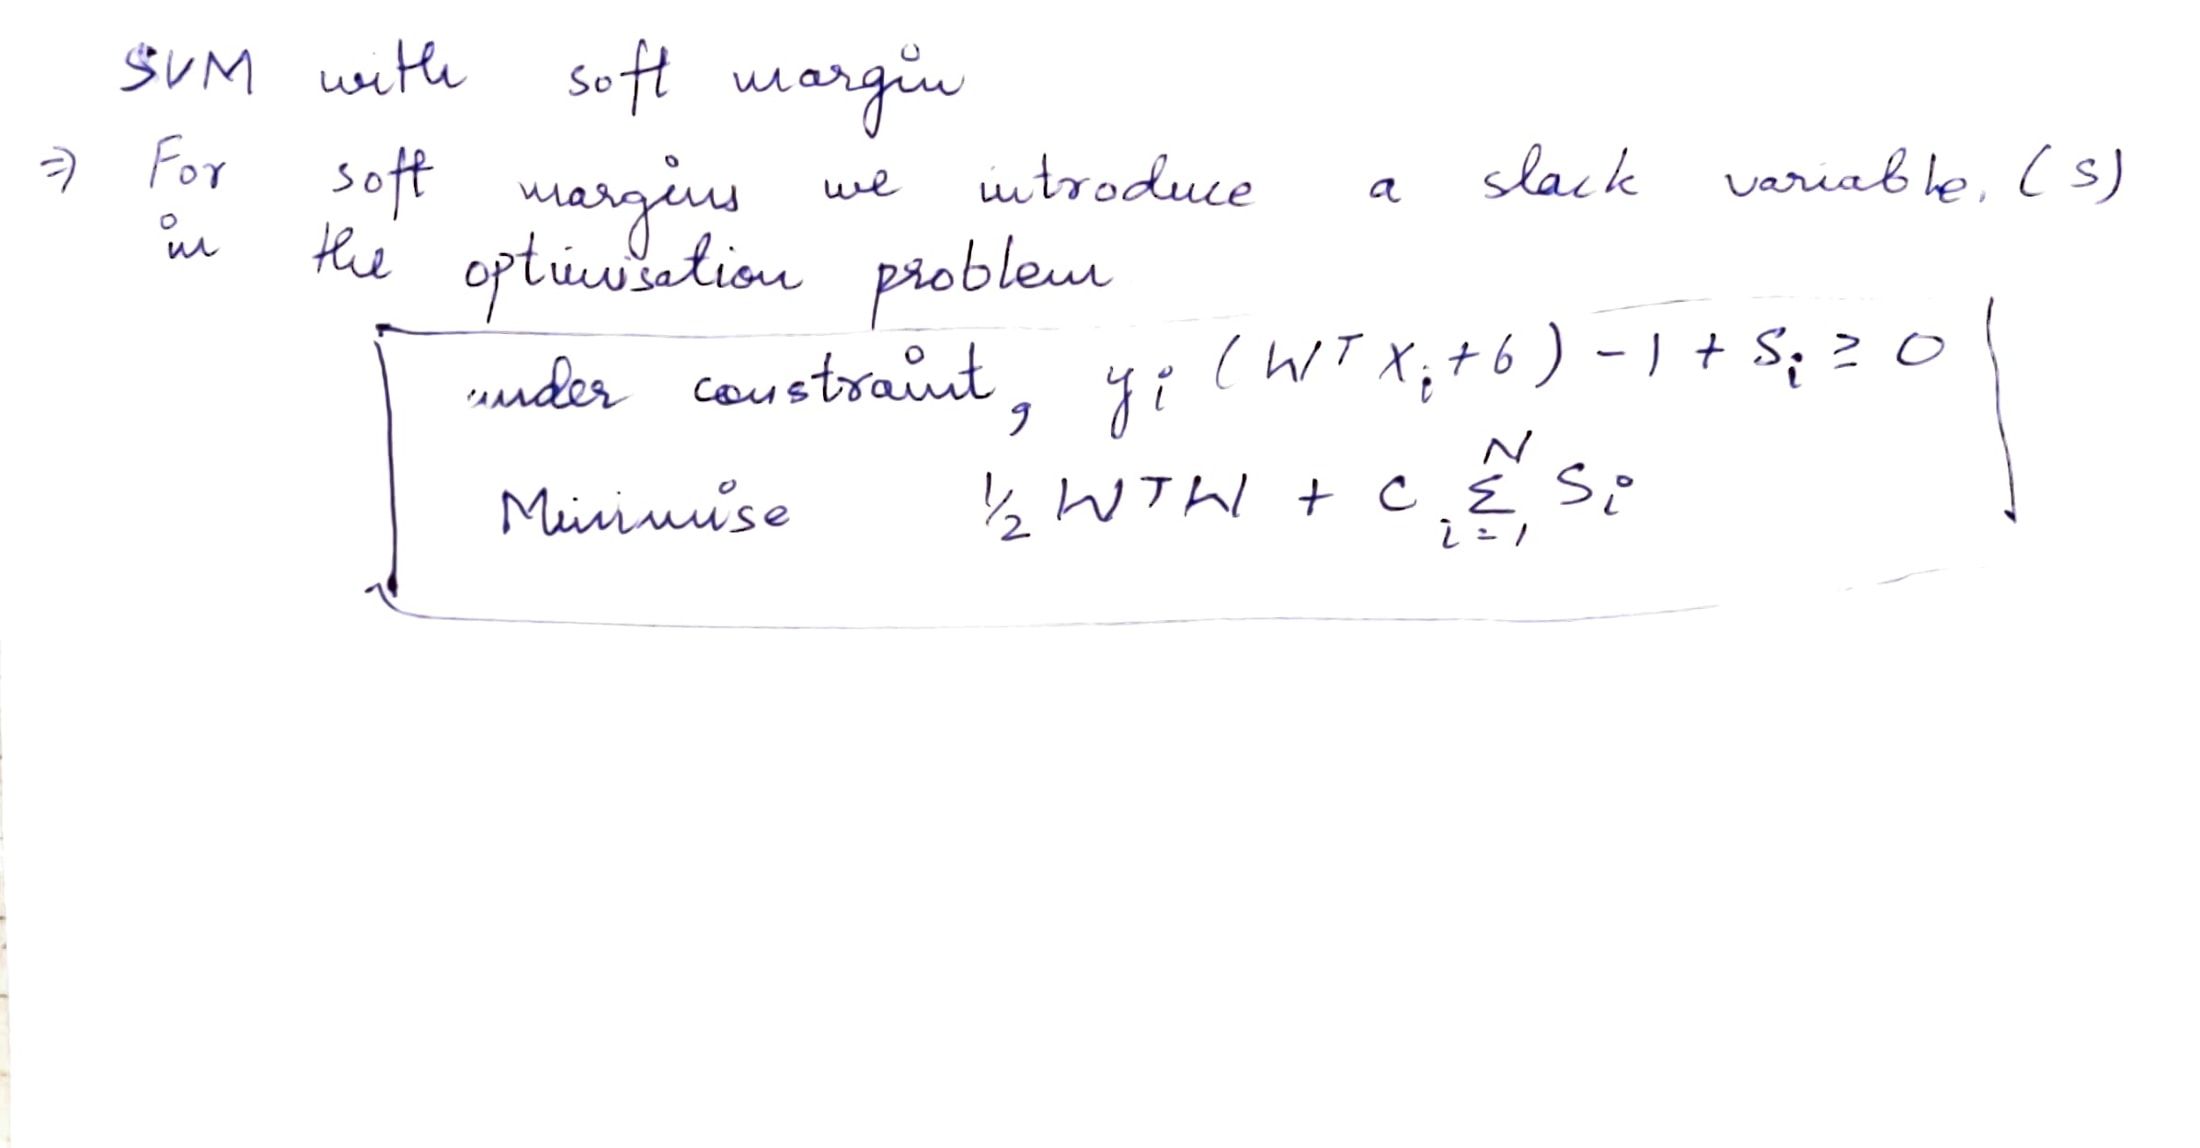

In [ ]:
from IPython import display
display.Image("soft.jpeg")

Calculated weight matrix is : [-0.22506809 -0.19858949]
Calculated bias is : 0.013672204267370152


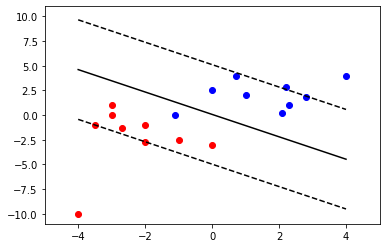

In [ ]:
sv = svmSlack()
w,b = sv.train(X_test,Y_test,C=0.01)
print("Calculated weight matrix is :",w)
print("Calculated bias is :",b)
plotsvm(X_test,Y_test,sv,0)
plt.ylim(-11,11)
plt.xlim(-5,5)
plt.show()

Calculated weight matrix is : [-0.38493724 -0.35146444]
Calculated bias is : -0.12133891201898916


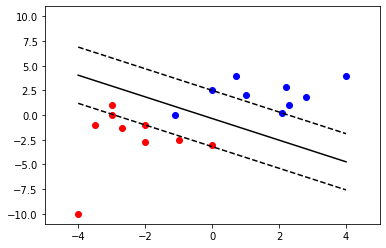

In [8]:
sv = svmSlack()
w,b = sv.train(X_test,Y_test,C=0.1)
print("Calculated weight matrix is :",w)
print("Calculated bias is :",b)
plotsvm(X_test,Y_test,sv,0)
plt.ylim(-11,11)
plt.xlim(-5,5)
plt.show()

Calculated weight matrix is : [-1.73913043 -1.30434783]
Calculated bias is : -2.9130434782869634


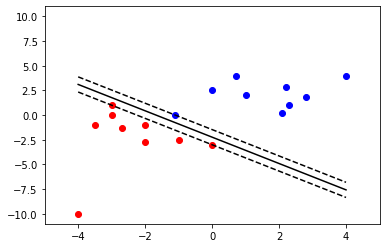

In [ ]:
sv = svmSlack()
w,b = sv.train(X_test,Y_test,C=3)
print("Calculated weight matrix is :",w)
print("Calculated bias is :",b)
plotsvm(X_test,Y_test,sv,0)
plt.ylim(-11,11)
plt.xlim(-5,5)
plt.show()

Calculated weight matrix is : [-1.73913043 -1.30434783]
Calculated bias is : -2.9130434783574235


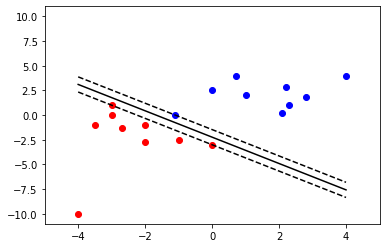

In [ ]:
sv = svmSlack()
w,b = sv.train(X_test,Y_test,C=10)
print("Calculated weight matrix is :",w)
print("Calculated bias is :",b)
plotsvm(X_test,Y_test,sv,0)
plt.ylim(-11,11)
plt.xlim(-5,5)
plt.show()

Calculated weight matrix is : [-1.73913044 -1.30434783]
Calculated bias is : -2.9130434786825745


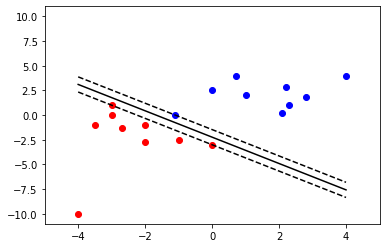

In [ ]:
sv = svmSlack()
w,b = sv.train(X_test,Y_test,C=100)
print("Calculated weight matrix is :",w)
print("Calculated bias is :",b)
plotsvm(X_test,Y_test,sv,0)
plt.ylim(-11,11)
plt.xlim(-5,5)
plt.show()

Take the case of C = 100 and remove the support vectors. Does the boundary change after the deletion?
Explain why? Show your results by appropriate plots?

Calculated weight matrix is : [-0.38493724 -0.35146444]
Calculated bias is : -0.12133891214351254


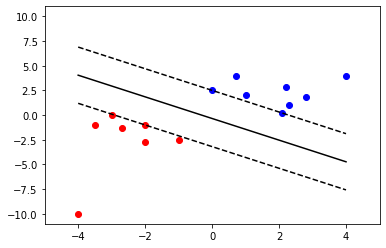

In [ ]:
# Write your Code here
X_new = np.delete(X_test,[2,7,8],axis=0)
y_new = np.delete(Y_test,[2,7,8])
sv = svmSlack()
w,b = sv.train(X_new,y_new,C=100)
print("Calculated weight matrix is :",w)
print("Calculated bias is :",b)
plotsvm(X_new,y_new,sv,0)
plt.ylim(-11,11)
plt.xlim(-5,5)
plt.show()


As seen in the above graph the decision boundary changes as we removed the support vectors. Thus new support vectors are found corresponding to the dataset and decision boundary is made

### Subsection 2

In [ ]:
!pip install python-mnist
!rm -rf samples
!mkdir samples
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz -P samples/
!gunzip samples/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz -P samples/
!gunzip samples/train-labels-idx1-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz -P samples/
!gunzip samples/t10k-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz -P samples/
!gunzip samples/t10k-labels-idx1-ubyte.gz

Defaulting to user installation because normal site-packages is not writeable
--2021-03-11 16:18:54--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 2606:4700:90ce:3911:88ca:104:be93:f32b, 104.21.29.36, 172.67.171.76
Connecting to yann.lecun.com (yann.lecun.com)|2606:4700:90ce:3911:88ca:104:be93:f32b|:80... connected.
HTTP request sent, awaiting response... 503 Service Unavailable
2021-03-11 16:18:57 ERROR 503: Service Unavailable.

gzip: samples/train-images-idx3-ubyte.gz: No such file or directory
--2021-03-11 16:18:58--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 2606:4700:90ce:3911:88ca:104:be93:f32b, 172.67.171.76, 104.21.29.36
Connecting to yann.lecun.com (yann.lecun.com)|2606:4700:90ce:3911:88ca:104:be93:f32b|:80... connected.
HTTP request sent, awaiting response... 503 Service Unavailable
2021-03-11 16:18:58 ERROR 503: Service Unavailable.

gzip: samples/trai

In [ ]:
# Import Relevant Packages
from sklearn.svm import SVC
import numpy as np
from mnist.loader import MNIST
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,classification_report
from time import time

In [ ]:
mndata = MNIST('samples')

# Load training dataset
images, labels = mndata.load_training()
l = len(labels)
images_train = np.array(images)
labels_train = np.array(labels)

print(images_train.shape)
print(labels_train.shape)

(60000, 784)
(60000,)


In [ ]:
# Load testing dataset
images, labels = mndata.load_testing()
l = len(labels)
images_test = np.array(images)
labels_test = np.array(labels)

print(images_test.shape)
print(labels_test.shape) 

(10000, 784)
(10000,)


In [ ]:
Y_train = labels_train[np.where((labels_train == 2)| (labels_train==1)|( labels_train==0))]
X_train = images_train[np.where((labels_train == 2)| (labels_train==1)|( labels_train==0))]
X_test = images_test[np.where((labels_test == 2)| (labels_test == 1)|(labels_test == 0))]
Y_test  = labels_test[np.where((labels_test == 2)| (labels_test == 1)|(labels_test == 0))]

- Tweak different parameters like the C Parameter and gamma parameter of the Linear SVM and report the results.
- Experiment different kernels for classification and report the results.

Report accuracy score, F1-score, Confusion matrix and any other metrics you feel useful.

In [ ]:
svc = SVC(C=0.5, kernel='linear', gamma=10)
svc.fit(X_train, Y_train)
svm_prediction = svc.predict(X_test)

print("C = 0.5 and Gamma = 10")


print("----------------------------------------------------\nAccuracy Score: ", accuracy_score(svm_prediction,Y_test))
print("----------------------------------------------------\nConfusion Matrix:\n", confusion_matrix(svm_prediction,Y_test))
print("----------------------------------------------------\nClassification Report:\n",classification_report(svm_prediction,Y_test))




C = 0.5 and Gamma = 10
----------------------------------------------------
Accuracy Score:  0.9809342230695901
----------------------------------------------------
Confusion Matrix:
 [[ 971    1   24]
 [   0 1127   19]
 [   9    7  989]]
----------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       996
           1       0.99      0.98      0.99      1146
           2       0.96      0.98      0.97      1005

    accuracy                           0.98      3147
   macro avg       0.98      0.98      0.98      3147
weighted avg       0.98      0.98      0.98      3147



In [ ]:
svc = SVC(C=2, kernel='linear', gamma=0.000000000000023523)
svc.fit(X_train, Y_train)
svm_prediction = svc.predict(X_test)
print("C = 2 and Gamma = 0.000000000000023523")


print("----------------------------------------------------\nAccuracy Score: ", accuracy_score(svm_prediction,Y_test))
print("----------------------------------------------------\nConfusion Matrix:\n", confusion_matrix(svm_prediction,Y_test))
print("----------------------------------------------------\nClassification Report:\n",classification_report(svm_prediction,Y_test))

C = 2 and Gamma = 0.000000000000023523
----------------------------------------------------
Accuracy Score:  0.9809342230695901
----------------------------------------------------
Confusion Matrix:
 [[ 971    1   24]
 [   0 1127   19]
 [   9    7  989]]
----------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       996
           1       0.99      0.98      0.99      1146
           2       0.96      0.98      0.97      1005

    accuracy                           0.98      3147
   macro avg       0.98      0.98      0.98      3147
weighted avg       0.98      0.98      0.98      3147



In [ ]:

svc = SVC(C=1, kernel='poly', gamma="scale")
svc.fit(X_train, Y_train)
svm_prediction = svc.predict(X_test)
print("Poly Kernel")
print("C = 1 and Gamma = scale")


print("----------------------------------------------------\nAccuracy Score: ", accuracy_score(svm_prediction,Y_test))
print("----------------------------------------------------\nConfusion Matrix:\n", confusion_matrix(svm_prediction,Y_test))
print("----------------------------------------------------\nClassification Report:\n",classification_report(svm_prediction,Y_test))

Poly Kernel
C = 1 and Gamma = scale
----------------------------------------------------
Accuracy Score:  0.9939625039720369
----------------------------------------------------
Confusion Matrix:
 [[ 975    0    7]
 [   2 1132    4]
 [   3    3 1021]]
----------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       982
           1       1.00      0.99      1.00      1138
           2       0.99      0.99      0.99      1027

    accuracy                           0.99      3147
   macro avg       0.99      0.99      0.99      3147
weighted avg       0.99      0.99      0.99      3147



In [ ]:

svc = SVC(C=1, kernel='rbf', gamma="scale")
svc.fit(X_train, Y_train)

svm_prediction = svc.predict(X_test)
print("rbf Kernel")
print("C = 1 and Gamma = scale")


print("----------------------------------------------------\nAccuracy Score: ", accuracy_score(svm_prediction,Y_test))
print("----------------------------------------------------\nConfusion Matrix:\n", confusion_matrix(svm_prediction,Y_test))
print("----------------------------------------------------\nClassification Report:\n",classification_report(svm_prediction,Y_test))

rbf Kernel
C = 1 and Gamma = scale
----------------------------------------------------
Accuracy Score:  0.9955513187162377
----------------------------------------------------
Confusion Matrix:
 [[ 979    0    8]
 [   0 1131    1]
 [   1    4 1023]]
----------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       987
           1       1.00      1.00      1.00      1132
           2       0.99      1.00      0.99      1028

    accuracy                           1.00      3147
   macro avg       1.00      1.00      1.00      3147
weighted avg       1.00      1.00      1.00      3147



In [ ]:
svc = SVC(C=1, kernel='sigmoid', gamma="scale")
svc.fit(X_train, Y_train)
svm_prediction = svc.predict(X_test)
print("Sigmoid Kernel")
print("C = 1 and Gamma = scale")


print("----------------------------------------------------\nAccuracy Score: ", accuracy_score(svm_prediction,Y_test))
print("----------------------------------------------------\nConfusion Matrix:\n", confusion_matrix(svm_prediction,Y_test))
print("----------------------------------------------------\nClassification Report:\n",classification_report(svm_prediction,Y_test))

Sigmoid Kernel
C = 1 and Gamma = scale
----------------------------------------------------
Accuracy Score:  0.9504289799809342
----------------------------------------------------
Confusion Matrix:
 [[ 938    0   46]
 [   1 1110   43]
 [  41   25  943]]
----------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       984
           1       0.98      0.96      0.97      1154
           2       0.91      0.93      0.92      1009

    accuracy                           0.95      3147
   macro avg       0.95      0.95      0.95      3147
weighted avg       0.95      0.95      0.95      3147

